# Python test for machine-learning

### Importing data

In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

data=pd.read_csv('product_adme.csv')

C:\Users\joaof\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (24,26,29,30,61,63,69,74,75,76,101,103,108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


dropping unnecessary columns

In [3]:
data=data.drop(columns=['md', 'cp','cr','at','aa','molregno.2','molregno.1','doc_id.1','doc_id.2','molregno.3','doc_id.1','doc_id.2'])
data=data.drop(columns=['src_id.1','chembl_id.1','assay_id.1','record_id.1'])


**Evaluating the dataframe created** 
* evaluating datatypes

In [4]:
data.dtypes

molregno                        int64
pref_name                      object
chembl_id                      object
max_phase                       int64
therapeutic_flag                int64
dosed_ingredient                int64
structure_type                 object
chebi_par_id                  float64
molecule_type                  object
first_approval                float64
oral                            int64
parenteral                      int64
topical                         int64
black_box_warning               int64
natural_product                 int64
first_in_class                  int64
chirality                       int64
prodrug                         int64
inorganic_flag                  int64
usan_year                     float64
availability_type               int64
usan_stem                      object
polymer_flag                    int64
usan_substem                   object
usan_stem_definition           object
indication_class               object
withdrawn_fl

* evaluating certain columns

In [5]:
data['published_type'].describe()

count     352124
unique       308
top         logP
freq       38680
Name: published_type, dtype: object

* filtering data

In [6]:
data[data["published_type"] == "logP"]

,molregno,pref_name,chembl_id,max_phase,therapeutic_flag,dosed_ingredient,structure_type,chebi_par_id,molecule_type,first_approval,...,standard_type,activity_comment,published_type,data_validity_comment,potential_duplicate,published_relation,pchembl_value,bao_endpoint,uo_units,qudt_units
67,454016,CYTARAZID,CHEMBL488625,0,0,0,MOL,NaN,Small molecule,NaN,...,LogP,NaN,logP,NaN,0,=,NaN,BAO_0002130,NaN,NaN
68,51182,CYTARABINE,CHEMBL803,4,1,1,MOL,28680.0,Small molecule,1969.0,...,LogP,NaN,logP,NaN,0,=,NaN,BAO_0002130,NaN,NaN
104,490,BMS-182874,CHEMBL267458,0,0,0,MOL,NaN,Small molecule,NaN,...,LogP,NaN,logP,NaN,0,=,NaN,BAO_0002130,NaN,NaN
105,499,NaN,CHEMBL266315,0,0,0,MOL,NaN,Small molecule,NaN,...,LogP,NaN,logP,NaN,0,=,NaN,BAO_0002130,NaN,NaN
106,525,NaN,CHEMBL266684,0,0,0,MOL,NaN,Small molecule,NaN,...,LogP,NaN,logP,NaN,0,=,NaN,BAO_0002130,NaN,NaN
107,759,NaN,CHEMBL268116,0,0,0,MOL,NaN,Small molecule,NaN,...,LogP,NaN,logP,NaN,0,=,NaN,BAO_0002130,NaN,NaN
108,766,NaN,CHEMBL7019,0,0,0,MOL,NaN,Small molecule,NaN,...,LogP,NaN,logP,NaN,0,=,NaN,BAO_0002130,NaN,NaN
109,645,NaN,CHEMBL6630,0,0,0,MOL,NaN,Small molecule,NaN,...,LogP,NaN,logP,NaN,0,=,NaN,BAO_0002130,NaN,NaN
110,587,NaN,CHEMBL6433,0,0,0,MOL,NaN,Small molecule,NaN,...,LogP,NaN,logP,NaN,0,=,NaN,BAO_0002130,NaN,NaN
111,597,NaN,CHEMBL6468,0,0,0,MOL,NaN,Small molecule,NaN,...,LogP,NaN,logP,NaN,0,=,NaN,BAO_0002130,NaN,NaN


* histogram for numerical values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001550D2456D8>]],
      dtype=object)

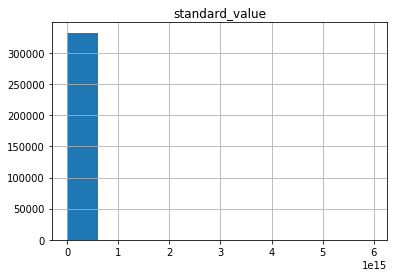

In [8]:
data.hist(column="standard_value")

### para filtrar por count é:

logP                 38680
T1/2                 26557
LD50                 18911
pKa                  14644
Dose                 12041
Dose/organ           11747
Ratio                11695
logD                 10547
clogP                 8384
Diuretic activity     6872
IC50                  6605
Solubility            6460
Toxicity              6019
Concentration         5992
F                     5484
S                     5472
Biodistribution       5298
Binding energy        4234
TD50                  4150
LD10                  3957
Cmax                  3948
AUC                   3925
Distribution          3862
Therapeutic index     3677
Log S                 3597
Activity              3043
TI                    2655
Log K                 2521
Dose/g                2466
Ki                    2259
k'                    2178
Bioavailabiility      2085
Name: published_type, dtype: int64

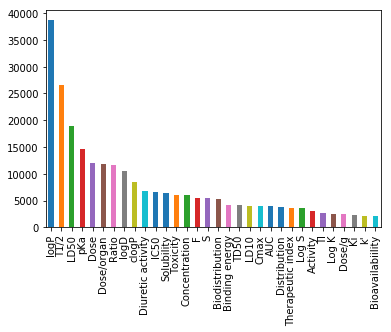

In [10]:
teste=data.groupby("published_type").filter(lambda x: len(x) > 2000)
#plot
teste["published_type"].value_counts().plot(kind='bar')
#print list
teste["published_type"].value_counts()

## filtering for pKa

,molregno,pref_name,chembl_id,max_phase,therapeutic_flag,dosed_ingredient,structure_type,chebi_par_id,molecule_type,first_approval,...,standard_type,activity_comment,published_type,data_validity_comment,potential_duplicate,published_relation,pchembl_value,bao_endpoint,uo_units,qudt_units
600,2555,NaN,CHEMBL268822,0,0,0,MOL,NaN,Small molecule,NaN,...,pKa,NaN,pKa,NaN,0,=,NaN,BAO_0002131,NaN,NaN
601,2686,NaN,CHEMBL7826,0,0,0,MOL,NaN,Small molecule,NaN,...,pKa,NaN,pKa,NaN,0,=,NaN,BAO_0002131,NaN,NaN
602,2696,NaN,CHEMBL429008,0,0,0,MOL,NaN,Small molecule,NaN,...,pKa,NaN,pKa,NaN,0,=,NaN,BAO_0002131,NaN,NaN
603,2725,L-158809,CHEMBL7550,0,0,0,MOL,NaN,Small molecule,NaN,...,pKa,NaN,pKa,NaN,0,=,NaN,BAO_0002131,NaN,NaN
604,408842,LOSARTAN,CHEMBL191,4,1,1,MOL,6541.0,Small molecule,1995.0,...,pKa,NaN,pKa,NaN,0,=,NaN,BAO_0002131,NaN,NaN
605,2574,NaN,CHEMBL7641,0,0,0,MOL,NaN,Small molecule,NaN,...,pKa,NaN,pKa,NaN,0,=,NaN,BAO_0002131,NaN,NaN
606,2269,NaN,CHEMBL7632,0,0,0,MOL,NaN,Small molecule,NaN,...,pKa,NaN,pKa,NaN,0,=,NaN,BAO_0002131,NaN,NaN
607,2282,NaN,CHEMBL267056,0,0,0,MOL,NaN,Small molecule,NaN,...,pKa,NaN,pKa,NaN,0,=,NaN,BAO_0002131,NaN,NaN
608,2321,NaN,CHEMBL7478,0,0,0,MOL,NaN,Small molecule,NaN,...,pKa,NaN,pKa,NaN,0,=,NaN,BAO_0002131,NaN,NaN
609,2332,NaN,CHEMBL7396,0,0,0,MOL,NaN,Small molecule,NaN,...,pKa,NaN,pKa,NaN,0,=,NaN,BAO_0002131,NaN,NaN


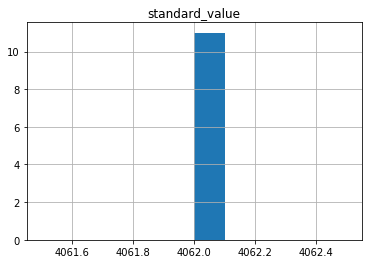

In [102]:
pka_data=data[data["published_type"] == "pKa"]
#pka_data.dropna
[pka_data['standard_value'].sum(), # Total sum of the column values
 pka_data['standard_value'].mean(), # Mean of the column values
 pka_data['standard_value'].median(), # Median of the column values
 pka_data['standard_value'].nunique(), # Number of unique entries
 pka_data['standard_value'].max(), # Maximum of the column values
 pka_data['standard_value'].min()] # Minimum of the column values

pka_data[pka_data["standard_value"]>400].hist(column="standard_value")
pka_data_corrected=pka_data[pka_data["standard_value"]<400]


In [109]:
pka_data.columns
pka_data_corrected=pka_data[[ 'max_phase','dosed_ingredient', 'structure_type',  'molecule_type',
        'oral', 'parenteral', 'topical', 'black_box_warning',
       'natural_product', 'first_in_class', 'chirality', 'prodrug',
       'inorganic_flag', 'usan_year', 'availability_type', 'usan_stem',
       'polymer_flag', 'usan_substem', 'usan_stem_definition',
       'indication_class', 'withdrawn_flag', 'withdrawn_year',
       'withdrawn_country', 'withdrawn_reason', 'mw_freebase', 'alogp', 'hba',
       'hbd', 'psa', 'rtb', 'ro3_pass', 'num_ro5_violations', 'acd_most_apka',
       'acd_most_bpka', 'acd_logp', 'acd_logd', 'molecular_species',
       'full_mwt', 'aromatic_rings', 'heavy_atoms', 'num_alerts',
       'qed_weighted', 'mw_monoisotopic', 'full_molformula', 'hba_lipinski',
       'hbd_lipinski', 'num_lipinski_ro5_violations', 
       'description', 'assay_type', 'relationship_type', 'confidence_score','standard_value', 'standard_flag']]
pka_data_corrected_1=pka_data_corrected[pka_data_corrected['standard_value']<400]

In [70]:
pka_data["data_validity_comment"].value_counts()# potential missing information ##103
pka_data["published_type"].value_counts()# ok para apagar

pka_data["potential_duplicate"].value_counts()# ok para apagar
pka_data["pchembl_value"].value_counts()# ok para apagar

pka_data["qudt_units"].value_counts()# ok para apagar
pka_data["uo_units"].value_counts()# ok para apagar

pka_data["standard_units"].value_counts()# ok para apagar
pka_data["assay_subcellular_fraction"].value_counts()# ok para apagar
pka_data["relationship_type"].value_counts()# ok para apagar

pka_data["standard_relation"].value_counts()# ok para apagar

pka_data["activity_comment"].value_counts()# ok para apagar


Not Determined           1695
No data                   124
Could not be measured      32
Name: activity_comment, dtype: int64

In [ ]:
pka_data[['description', 'assay_type', 'assay_test_type',
       'assay_category', 'assay_organism', 'assay_tax_id', 'assay_strain',
       'assay_tissue', 'assay_cell_type', 'assay_subcellular_fraction', 'tid',
       'relationship_type', 'confidence_score', 'curated_by', 'src_assay_id',
       'cell_id', 'bao_format', 'tissue_id', 'variant_id',
       'standard_relation', 'published_value', 'published_units',
       'standard_value',  'standard_type',
       'activity_comment', 'published_relation','tissue_id','assay_subcellular_fraction']].describe()

In [222]:
pka_data_train=pka_data_corrected_1.sample(frac=0.7,random_state=200)
pka_data_test=pka_data_corrected_1.drop(pka_data_train.index)

##para teste apenas
pka_data_train1=pka_data_train.drop(columns=['usan_year','withdrawn_year','standard_flag','usan_stem','ro3_pass','usan_substem','usan_stem_definition','indication_class','withdrawn_reason','withdrawn_country','molecular_species','structure_type','molecule_type','full_molformula','description','relationship_type','assay_type'])
pka_data_train2=pka_data_train1.dropna()
pka_data_test1=pka_data_test.drop(columns=['usan_year','withdrawn_year','standard_flag','usan_stem','ro3_pass','usan_substem','usan_stem_definition','indication_class','withdrawn_reason','withdrawn_country','molecular_species','structure_type','molecule_type','full_molformula','description','relationship_type','assay_type'])
pka_data_test2=pka_data_test1.dropna()

pka_data_x_train=pka_data_train2.drop(columns=['standard_value'])
pka_data_y_train=pka_data_train2['standard_value']

pka_data_x_test=pka_data_test2.drop(columns=['standard_value'])
pka_data_y_test=pka_data_test2['standard_value']




,max_phase,dosed_ingredient,oral,parenteral,topical,black_box_warning,natural_product,first_in_class,chirality,prodrug,...,aromatic_rings,heavy_atoms,num_alerts,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,confidence_score,standard_value
602,0,0,0,0,0,0,-1,-1,-1,-1,...,5.0,32.0,0.0,0.38,425.1964,8.0,2.0,1.0,0,5.00
603,0,0,0,0,0,0,-1,-1,-1,-1,...,5.0,31.0,0.0,0.45,409.2015,7.0,1.0,0.0,0,5.00
605,0,0,0,0,0,0,-1,-1,-1,-1,...,5.0,31.0,0.0,0.36,408.2062,6.0,1.0,1.0,0,5.00
666,0,0,0,0,0,0,-1,-1,-1,-1,...,1.0,26.0,2.0,0.51,377.1661,5.0,2.0,0.0,0,7.24
671,0,0,0,0,0,0,0,0,2,0,...,2.0,23.0,0.0,0.77,335.0827,6.0,2.0,0.0,0,7.24
672,0,0,0,0,0,0,-1,-1,-1,-1,...,1.0,28.0,3.0,0.28,387.2158,7.0,4.0,0.0,0,7.24
970,0,0,0,0,0,0,-1,-1,-1,-1,...,1.0,19.0,0.0,0.85,257.1780,2.0,2.0,0.0,0,7.16
974,0,0,0,0,0,0,-1,-1,-1,-1,...,2.0,17.0,0.0,0.72,221.1204,1.0,1.0,0.0,0,7.16
975,0,0,0,0,0,0,-1,-1,-1,-1,...,1.0,18.0,0.0,0.67,241.1830,1.0,0.0,0.0,0,7.16
984,0,0,0,0,0,0,-1,-1,-1,-1,...,1.0,17.0,0.0,0.72,227.1674,1.0,1.0,0.0,0,7.16


max_phase                        int64
dosed_ingredient                 int64
oral                             int64
parenteral                       int64
topical                          int64
black_box_warning                int64
natural_product                  int64
first_in_class                   int64
chirality                        int64
prodrug                          int64
inorganic_flag                   int64
availability_type                int64
polymer_flag                     int64
withdrawn_flag                   int64
mw_freebase                    float64
alogp                          float64
hba                            float64
hbd                            float64
psa                            float64
rtb                            float64
num_ro5_violations             float64
acd_most_apka                  float64
acd_most_bpka                  float64
acd_logp                       float64
acd_logd                       float64
full_mwt                 

In [199]:
regr = linear_model.LinearRegression()
#pka_data_x_train1.iloc[:,10:30 ]

#acd_most_bpka
regr.fit(pka_data_x_train, pka_data_y_train)
####TRANSFORMAR EM NUMERICO

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [200]:
print(regr.coef_)

[ 7.33945841e-03 -4.33481775e-01  3.78420819e-01 -3.78813946e-02
 -2.96228309e-02 -1.10433160e-01 -6.32346331e-01  4.29168378e+00
  8.39156944e-02  4.14319404e-01 -3.92821742e+00 -1.96580165e-01
 -1.76914039e-13  1.66550601e+00  2.06166893e-01  3.57661785e-02
  8.22498118e-04 -2.49016506e-01  1.42366802e-02 -6.38583701e-02
  8.49540780e-02 -3.72958977e-02  2.51650515e-02 -9.02438154e-02
  4.82936077e-02  6.11627875e-03 -2.85138562e-01  1.13594423e-01
 -1.63166976e-01 -1.27175947e+00 -2.16459930e-01 -2.00898610e-01
  1.00872985e-01 -3.33377380e-01  2.16011947e-01]


The mean square error

In [227]:
np.mean((regr.predict( pka_data_x_test)-pka_data_y_test)**2)

5.120498052204297

Explained variance score: 1 is perfect prediction
and 0 means that there is no linear relationship
between X and y.

In [224]:
regr.score(pka_data_x_test, pka_data_y_test)

0.015306812452998253